In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
import sys
sys.path.append('..')
from madule import plots
from scipy import stats
from statsmodels.stats.anova import AnovaRM

In [15]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')


### Proportion across tials

In [16]:
# Create empty dataframe to save proportion win stay and lose shift for each record
df_win_loss = pd.DataFrame()

# List of subjects
subList = np.unique(behAll.sub_ID)
for sub in subList:
    for session in range(2):
        for run in range(2):
            for block in ['Act', 'Stim']:
                
                # Take color or action value learning, one  
                behAllCond = behAll.loc[(behAll['session']==session+1)&(behAll['run']==run+1)&(behAll['block']==block)&(behAll['sub_ID']==sub)]
                # get reverse
                reverse = np.unique(behAllCond.reverse)[0]
                # get group label
                group = np.unique(behAllCond.group)[0]
                
                # number of winning reward for action value learning
                n_win = np.sum(behAllCond['correctChoice'].to_numpy()==1) 
                win_stay = np.zeros(n_win)
                if block=='Act':
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==1:
                            win_stay[j] = behAllCond['pushed'].to_numpy()[i]==behAllCond['pushed'].to_numpy()[i+1]
                            j+=1
                else:
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==1:
                            win_stay[j] = behAllCond['yellowChosen'].to_numpy()[i]==behAllCond['yellowChosen'].to_numpy()[i+1]
                            j+=1

                # number of punishment for action value learning
                n_loss = np.sum(behAllCond['correctChoice'].to_numpy()==0)
                loss_shift = np.zeros(n_loss)
                if block=='Act':
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==0:
                            loss_shift[j] = behAllCond['pushed'].to_numpy()[i]==behAllCond['pushed'].to_numpy()[i+1]
                            j+=1
                else:
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==0:
                            loss_shift[j] = behAllCond['yellowChosen'].to_numpy()[i]==behAllCond['yellowChosen'].to_numpy()[i+1]
                            j+=1
                
                # dictionary for each record
                dic = {'session':session+1, 'run':run+1, 'block':block, 'sub_ID':sub, 'reverse':reverse, 'group':group, 
                      'win_stay': win_stay.mean(), 'loss_shift':loss_shift.mean()}
                # Put the dictionary into dataframe
                df_win_loss = pd.concat([pd.DataFrame([dic]), df_win_loss])
                

Text(0, 0.5, 'Loss shift')

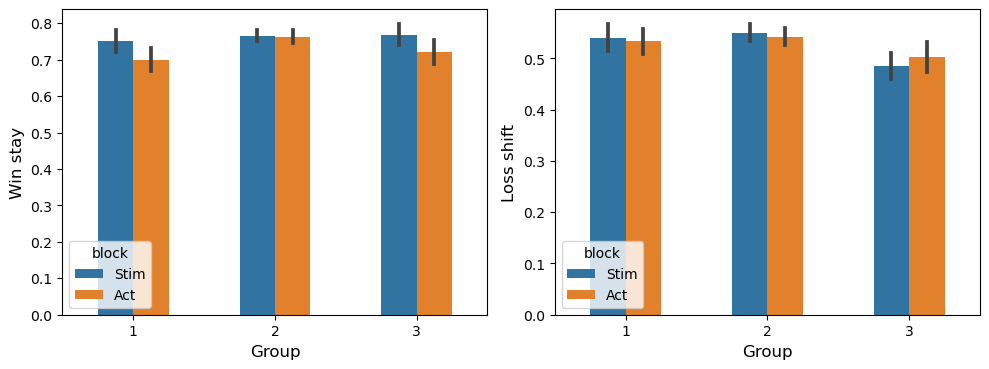

In [19]:
fig = plt.figure(figsize=(10,7), tight_layout=True)
row = 2
column = 2

# Win stay
fig.add_subplot(row, column, 1)
sns.barplot(data = df_win_loss, x='group', y='win_stay', hue='block',  width=.5, errorbar="se")
plt.xlabel('Group', fontsize='12')
plt.ylabel('Win stay', fontsize='12')

# Loss shift
fig.add_subplot(row, column, 2)
sns.barplot(data = df_win_loss, x='group', y='loss_shift', hue='block',  width=.5, errorbar="se")
plt.xlabel('Group', fontsize='12')
plt.ylabel('Loss shift', fontsize='12')
 

In [126]:
df_win_loss_group = df_win_loss.groupby(['group', 'sub_ID'], as_index=False)['loss_shift'].mean()

In [151]:
stats.ttest_rel(x1, x3)

TtestResult(statistic=1.9539165962446796, pvalue=0.0648398662825494, df=20)

In [141]:
df_win_loss_group[df_win_loss_group['group']==1]['loss_shift'].mean()

0.5369937522498586

In [106]:
stats.ttest_rel(df_win_loss_group[df_win_loss_group['group']==1]['loss_shift'], df_win_loss_group[df_win_loss_group['group']==3]['loss_shift'])

TtestResult(statistic=1.966762508142525, pvalue=0.06256450867502271, df=21)

In [89]:
anov = AnovaRM(data = df_win_loss[df_win_loss['group']!=2], depvar='loss_shift', subject='sub_ID', within=['group', 'block'], between=None, aggregate_func='mean')
print(anov.fit())


                  Anova
            F Value Num DF  Den DF Pr > F
-----------------------------------------
group        3.8682 1.0000 21.0000 0.0626
block        0.0832 1.0000 21.0000 0.7758
group:block  0.6369 1.0000 21.0000 0.4338



In [79]:
anov = AnovaRM(data = df_win_loss[df_win_loss['group']!=2], depvar='win_stay', subject='sub_ID', within=['group', 'block'], between=None, aggregate_func='mean')
print(anov.fit())


                  Anova
            F Value Num DF  Den DF Pr > F
-----------------------------------------
group        0.3810 1.0000 21.0000 0.5437
block        4.0435 1.0000 21.0000 0.0574
group:block  0.0056 1.0000 21.0000 0.9408



In [77]:
import pingouin as pg
pg.mixed_anova(dv='loss_shift', between='group', within='block', subject='sub_ID', data=df_win_loss[df_win_loss['group']!=1])


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,0.062767,1,44,0.062767,1.885763,0.176638,0.041097,NaN
1,block,0.000499,1,44,0.000499,0.068116,0.795317,0.001546,1.0
2,Interaction,0.003718,1,44,0.003718,0.507952,0.479789,0.011413,NaN


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='genotype', y='yield', hue='fertilizer', data=df_melt)
plt.show()


,session,run,block,sub_ID,reverse,group,win_stay,loss_shift
0,2,2,Stim,sub-090,14.0,2,0.954545,0.666667
0,2,2,Act,sub-090,21.0,2,0.954545,0.684211
0,2,1,Stim,sub-090,21.0,2,0.925926,0.866667
0,2,1,Act,sub-090,14.0,2,0.842105,0.476190
0,1,2,Stim,sub-090,14.0,2,0.941176,0.583333
...,...,...,...,...,...,...,...,...
0,2,1,Act,sub-012,21.0,2,0.960000,0.812500
0,1,2,Stim,sub-012,14.0,2,0.869565,0.812500
0,1,2,Act,sub-012,21.0,2,0.954545,0.789474
0,1,1,Stim,sub-012,21.0,2,0.954545,0.736842


In [25]:
df_win_g1.mean(), df_win_g2.mean(),  df_win_g3.mean()

(0.7260100470743995, 0.7648981773054487, 0.7451021517402385)

In [26]:
df_loss_g1.mean(), df_loss_g2.mean(),  df_loss_g3.mean()

(0.5369937522498586, 0.5369937522498586, 0.5369937522498586)

In [27]:
stats.ttest_ind(df_win_g1, df_win_g2)

Ttest_indResult(statistic=-1.7207038816577742, pvalue=0.08641724509876467)

In [28]:
stats.ttest_ind(df_win_g3, df_win_g2)

Ttest_indResult(statistic=-0.8733771945738393, pvalue=0.3832113005187022)

In [29]:
stats.ttest_rel(df_win_g1, df_win_g3)

TtestResult(statistic=-0.8401584476013372, pvalue=0.40312254182413154, df=87)

In [36]:
behAll.groupby(['session', 'run', 'block', 'sub_ID'], as_index=False)['correctChoice'].mean()

,session,run,block,sub_ID,correctChoice
0,1,1,Act,sub-004,0.411765
1,1,1,Act,sub-010,0.526316
2,1,1,Act,sub-012,0.475000
3,1,1,Act,sub-025,0.428571
4,1,1,Act,sub-026,0.425000
...,...,...,...,...,...
363,2,2,Stim,sub-089,0.585366
364,2,2,Stim,sub-090,0.550000
365,2,2,Stim,sub-092,0.550000
366,2,2,Stim,sub-108,0.425000


### Proportion for each trial

In [29]:
# Find chosen win amount for each trial
chosenAmount = behAll['leftChosen']*behAll['winAmtLeft'] + (1-behAll['leftChosen'])*behAll['winAmtRight'] 
behAll['chosenWinAmt'] = chosenAmount

- Win stay and large amount
- win stay and lower amount
- loss shift and larger amount
- loss shift and lower amount

In [41]:
# Create empty dataframe to save proportion win stay and lose shift for each record
df_win_loss = pd.DataFrame()

# List of subjects
subList = np.unique(behAll.sub_ID)
for sub in subList:
    for session in range(2):
        for run in range(2):
            for block in ['Act', 'Stim']:
                
                # Take color or action value learning, one  
                behAllCond = behAll.loc[(behAll['session']==session+1)&(behAll['run']==run+1)&(behAll['block']==block)&(behAll['sub_ID']==sub)]
                # get reverse
                reverse = np.unique(behAllCond.reverse)[0]
                # get group label
                group = np.unique(behAllCond.group)[0]
                
                # number of winning reward for action value learning
                n_win = np.sum((behAllCond['correctChoice'].to_numpy()==1) * (behAllCond['chosenWinAmt'].to_numpy()<=50))
                win_stay = np.zeros(n_win)
                if block=='Act':
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==1 and behAllCond['chosenWinAmt'].to_numpy()[i]<=50:
                            win_stay[j] = behAllCond['pushed'].to_numpy()[i]==behAllCond['pushed'].to_numpy()[i+1]
                            j+=1
                else:
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==1 and behAllCond['chosenWinAmt'].to_numpy()[i]<=50:
                            win_stay[j] = behAllCond['yellowChosen'].to_numpy()[i]==behAllCond['yellowChosen'].to_numpy()[i+1]
                            j+=1

                # number of punishment for action value learning
                n_loss = np.sum((behAllCond['correctChoice'].to_numpy()==0) * (behAllCond['chosenWinAmt'].to_numpy()<=50))
                loss_shift = np.zeros(n_loss)
                if block=='Act':
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==0 and behAllCond['chosenWinAmt'].to_numpy()[i]<=50:
                            loss_shift[j] = behAllCond['pushed'].to_numpy()[i]==behAllCond['pushed'].to_numpy()[i+1]
                            j+=1
                else:
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==0 and behAllCond['chosenWinAmt'].to_numpy()[i]<=50:
                            loss_shift[j] = behAllCond['yellowChosen'].to_numpy()[i]==behAllCond['yellowChosen'].to_numpy()[i+1]
                            j+=1
                
                # dictionary for each record
                dic = {'session':session+1, 'run':run+1, 'block':block, 'sub_ID':sub, 'reverse':reverse, 'group':group, 
                      'win_stay': win_stay.mean(), 'loss_shift':loss_shift.mean()}
                # Put the dictionary into dataframe
                df_win_loss = pd.concat([pd.DataFrame([dic]), df_win_loss])
                

/tmp/ipykernel_830582/3670871078.py:52: RuntimeWarning: Mean of empty slice.
  'win_stay': win_stay.mean(), 'loss_shift':loss_shift.mean()}
/mrhome/amingk/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_830582/3670871078.py:52: RuntimeWarning: Mean of empty slice.
  'win_stay': win_stay.mean(), 'loss_shift':loss_shift.mean()}
/mrhome/amingk/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_830582/3670871078.py:52: RuntimeWarning: Mean of empty slice.
  'win_stay': win_stay.mean(), 'loss_shift':loss_shift.mean()}
/mrhome/amingk/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_830582/3670871078.py:52: Run

In [42]:
df_win_loss_group = df_win_loss.groupby(['group'], as_index=False)['win_stay', 'loss_shift'].mean()

/tmp/ipykernel_830582/4046870841.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_win_loss_group = df_win_loss.groupby(['group'], as_index=False)['win_stay', 'loss_shift'].mean()


In [43]:
df_win_loss_group

,group,win_stay,loss_shift
0,1,0.755191,0.531708
1,2,0.795031,0.579105
2,3,0.808614,0.517873


In [87]:
df_win_loss.groupby(['block', 'group'], as_index=False)['loss_shift'].mean()

,block,group,loss_shift
0,Act,1,0.002331
1,Act,2,0.004885
2,Act,3,0.002237
3,Stim,1,0.002293
4,Stim,2,0.004764
5,Stim,3,0.002051


In [83]:
df_win_loss

,block,group,sub_ID,win_stay,loss_shift
0,Stim,3,sub-109,0.013453,0.005146
0,Act,3,sub-109,0.012812,0.008148
0,Stim,2,sub-109,0.000000,0.000000
0,Act,2,sub-109,0.000000,0.000000
0,Stim,1,sub-109,0.011531,0.003859
...,...,...,...,...,...
0,Act,3,sub-004,0.009609,0.004717
0,Stim,2,sub-004,0.000000,0.000000
0,Act,2,sub-004,0.000000,0.000000
0,Stim,1,sub-004,0.012812,0.003859
